# DATA PREPROCESSING

In [ ]:
!pip install pandas


In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
array = dataset.values

In [4]:
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

## Scaling

- **MinMaxScaler** scales the data so that each feature is in the range [0, 1]. 
- It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.

In [ ]:
!pip install scikit-learn

In [46]:
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) 

In [47]:
data_rescaled = data_scaler.fit_transform(array)

In [48]:
from numpy import set_printoptions 
set_printoptions(precision=1)
print ("\nScaled data:\n", data_rescaled[0:10])



Scaled data:
 [[0.4 0.7 0.6 0.4 0.  0.5 0.2 0.5 1. ]
 [0.1 0.4 0.5 0.3 0.  0.4 0.1 0.2 0. ]
 [0.5 0.9 0.5 0.  0.  0.3 0.3 0.2 1. ]
 [0.1 0.4 0.5 0.2 0.1 0.4 0.  0.  0. ]
 [0.  0.7 0.3 0.4 0.2 0.6 0.9 0.2 1. ]
 [0.3 0.6 0.6 0.  0.  0.4 0.1 0.2 0. ]
 [0.2 0.4 0.4 0.3 0.1 0.5 0.1 0.1 1. ]
 [0.6 0.6 0.  0.  0.  0.5 0.  0.1 0. ]
 [0.1 1.  0.6 0.5 0.6 0.5 0.  0.5 1. ]
 [0.5 0.6 0.8 0.  0.  0.  0.1 0.6 1. ]]


## Normalization
Another useful data preprocessing technique is **Normalization**. This is used to rescale each row of data to have a length of 1. It is mainly useful in Sparse dataset where we have lots of zeros. We can rescale the data with the help of Normalizer class of scikit-learn Python library.

#### L1 Normalization
It may be defined as the normalization technique that modifies the dataset values in a way that **in each row the sum of the absolute values will always be up to 1**. It is also called Least Absolute Deviations.

#### L2 Normalization
It may be defined as the normalization technique that modifies the dataset values in a way that **in each row the sum of the squares will always be up to 1**. It is also called least squares.



In [49]:
#L1 Normalization
from sklearn.preprocessing import Normalizer 
Data_normalizer = Normalizer(norm='l1').fit(array) 

In [50]:
Data_normalized = Data_normalizer.transform(array)

In [51]:
print ("\nNormalized data:\n", Data_normalized [0:3])


Normalized data:
 [[0.  0.4 0.2 0.1 0.  0.1 0.  0.1 0. ]
 [0.  0.4 0.3 0.1 0.  0.1 0.  0.1 0. ]
 [0.  0.6 0.2 0.  0.  0.1 0.  0.1 0. ]]


In [52]:
#L2 Normalization
Data_normalizer = Normalizer(norm='l2').fit(array) 

In [53]:
Data_normalized = Data_normalizer.transform(array)

In [54]:
print ("\nNormalized data:\n", Data_normalized [0:3])


Normalized data:
 [[0.  0.8 0.4 0.2 0.  0.2 0.  0.3 0. ]
 [0.  0.7 0.6 0.2 0.  0.2 0.  0.3 0. ]
 [0.  0.9 0.3 0.  0.  0.1 0.  0.2 0. ]]


## Binarization
As the name suggests, this is the technique with the help of which we can make our data binary. We can use a binary threshold for making our data binary. The values above that threshold value will be converted to 1 and below that threshold will be converted to 0.

**For example, if we choose threshold value = 0.5, then the dataset value above it will become 1 and below this will become 0. That is why we can call it binarizing the data or thresholding the data. This technique is useful when we have probabilities in our dataset and want to convert them into crisp values.**

In [55]:
from sklearn.preprocessing import Binarizer 
binarizer = Binarizer(threshold=0.5).fit(array) 

In [56]:
Data_binarized = binarizer.transform(array)

In [57]:
print ("\nBinary data:\n", Data_binarized [0:5])


Binary data:
 [[1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]]


## Standardization
Another useful data preprocessing technique which is basically used to **transform the data attributes with a Gaussian distribution**. It differs the mean and SD (Standard Deviation) to a standard Gaussian distribution with a mean of 0 and a SD of 1.

This technique is useful in ML algorithms like linear regression, logistic regression that assumes a Gaussian distribution in input dataset and produce better results with rescaled data. We can standardize the data (mean = 0 and SD =1) with the help of StandardScaler class of scikit-learn Python library.

In [58]:
from sklearn.preprocessing import StandardScaler 
data_scaler = StandardScaler().fit(array) 

In [59]:
data_rescaled = data_scaler.transform(array)

In [60]:
set_printoptions(precision=2)

In [61]:
print ("\nRescaled data:\n", data_rescaled [0:5])


Rescaled data:
 [[ 0.64  0.85  0.15  0.91 -0.69  0.2   0.47  1.43  1.37]
 [-0.84 -1.12 -0.16  0.53 -0.69 -0.68 -0.37 -0.19 -0.73]
 [ 1.23  1.94 -0.26 -1.29 -0.69 -1.1   0.6  -0.11  1.37]
 [-0.84 -1.   -0.16  0.15  0.12 -0.49 -0.92 -1.04 -0.73]
 [-1.14  0.5  -1.5   0.91  0.77  1.41  5.48 -0.02  1.37]]


## Data Labelling
It is also very important to send the data to ML algorithms having proper labeling. For example, in case of classification problems, lot of labels in the form of words, numbers etc. are there on the data.


### Label Encoding
Most of the sklearn functions expect that the data with number labels rather than word labels. Hence, we need to convert such labels into number labels. This process is called label encoding. We can perform label encoding of data with the help of LabelEncoder() function of scikit-learn Python library.

In [62]:
from sklearn import preprocessing

In [63]:
input_labels = ['red','green','black','yellow','white']

In [64]:
encoder = preprocessing.LabelEncoder() 
input_labels = encoder.fit_transform(input_labels)


In [65]:
input_labels

array([2, 1, 0, 4, 3], dtype=int64)

# DATA FEATURE SELECTION

The performance of machine learning model is directly proportional to the data features used to train it. The performance of ML model will be affected negatively if the data features provided to it are irrelevant. On the other hand, use of relevant data features can increase the accuracy of your ML model especially linear and logistic regression.

## Univariate Selection
This feature selection technique is very useful in selecting those features, with the help of statistical testing, **having strongest relationship with the prediction variables**. We can implement univariate feature selection technique with the help of SelectKBest0class of scikit-learn Python library.

In [66]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest


In [67]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = array[:,0:8]
Y = array[:,8]


In [68]:
X

array([[  6.  , 148.  ,  72.  , ...,  33.6 ,   0.63,  50.  ],
       [  1.  ,  85.  ,  66.  , ...,  26.6 ,   0.35,  31.  ],
       [  8.  , 183.  ,  64.  , ...,  23.3 ,   0.67,  32.  ],
       ...,
       [  5.  , 121.  ,  72.  , ...,  26.2 ,   0.24,  30.  ],
       [  1.  , 126.  ,  60.  , ...,  30.1 ,   0.35,  47.  ],
       [  1.  ,  93.  ,  70.  , ...,  30.4 ,   0.32,  23.  ]])

In [69]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [70]:
from sklearn.feature_selection import chi2 

test = SelectKBest(score_func=chi2, k=4) 
fit = test.fit(X,Y)

In [71]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
print(fit.scores_) 

[ 111.52 1411.89   17.61   53.11 2175.57  127.67    5.39  181.3 ]


In [73]:
featured_data = fit.transform(X)

In [74]:
print ("\nFeatured data:\n", featured_data[0:4])


Featured data:
 [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]]


## Recursive Feature Elimination
As the name suggests, RFE (Recursive feature elimination) feature selection technique **removes the attributes recursively and builds the model with remaining attributes**. We can implement RFE feature selection technique with the help of RFE class of scikit-learn Python library.

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

In [76]:
model = LogisticRegression() 

In [77]:
rfe = RFE(model, n_features_to_select=3)

In [78]:
fit = rfe.fit(X, Y) 

In [79]:
print("Selected Features: %s", fit.support_) 
print("Feature Ranking: %s", fit.ranking_)

Selected Features: %s [ True False False False False  True  True False]
Feature Ranking: %s [1 2 4 5 6 1 1 3]


## Principal Component Analysis (PCA)
PCA, generally called data reduction technique, is very useful feature selection technique as it **uses linear algebra to transform the dataset into a compressed form**. We can implement PCA feature selection technique with the help of PCA class of scikit-learn Python library. We can select number of principal components in the output.

### PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.

In [80]:
from sklearn.decomposition import PCA 

In [81]:
pca = PCA(n_components=4) 

In [82]:
fit = pca.fit(X)

In [83]:
X_pca = pca.transform(X)

In [84]:
print("Explained Variance: %s", fit.explained_variance_) 

Explained Variance: %s [13456.57   932.76   390.58   198.18]


In [85]:
print(fit.components_)

[[-2.02e-03  9.78e-02  1.61e-02  6.08e-02  9.93e-01  1.40e-02  5.37e-04
  -3.56e-03]
 [-2.26e-02 -9.72e-01 -1.42e-01  5.79e-02  9.46e-02 -4.70e-02 -8.17e-04
  -1.40e-01]
 [-2.25e-02  1.43e-01 -9.22e-01 -3.07e-01  2.10e-02 -1.32e-01 -6.40e-04
  -1.25e-01]
 [-4.90e-02  1.20e-01 -2.63e-01  8.84e-01 -6.56e-02  1.93e-01  2.70e-03
  -3.01e-01]]


In [86]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (768, 8)
transformed shape: (768, 4)


# FEATURE IMPORTANCE
As the name suggests, feature importance technique is used to choose the importance features. It basically uses a trained supervised classifier to select features. We can implement this feature selection technique with the help of ExtraTreeClassifier class of scikit-learn Python library.

In [87]:
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier() 

In [88]:
model.fit(X,Y)

ExtraTreesClassifier()

In [89]:
print(model.feature_importances_)

[0.11 0.23 0.1  0.08 0.07 0.14 0.12 0.15]


From the output, we can observe that there are scores for each attribute. The higher the score, higher is the importance of that attribute.

# LINEAR MODELLING
The linear model is one of the most simple models in machine learning. It assumes that the data is linearly separable and tries to learn the weight of each feature. Mathematically, it can be written as, 

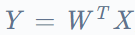

where X is the feature matrix, Y is the target variable, and W is the learned weight vector. We apply a transformation function or a threshold for the classification problem to convert the continuous-valued variable Y into a discrete category.

Linear models in machine learning are easy to implement and interpret and are helpful in solving many real-life use cases.

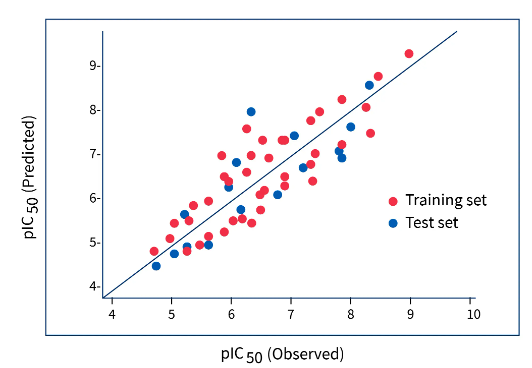


### Types of Linear Models
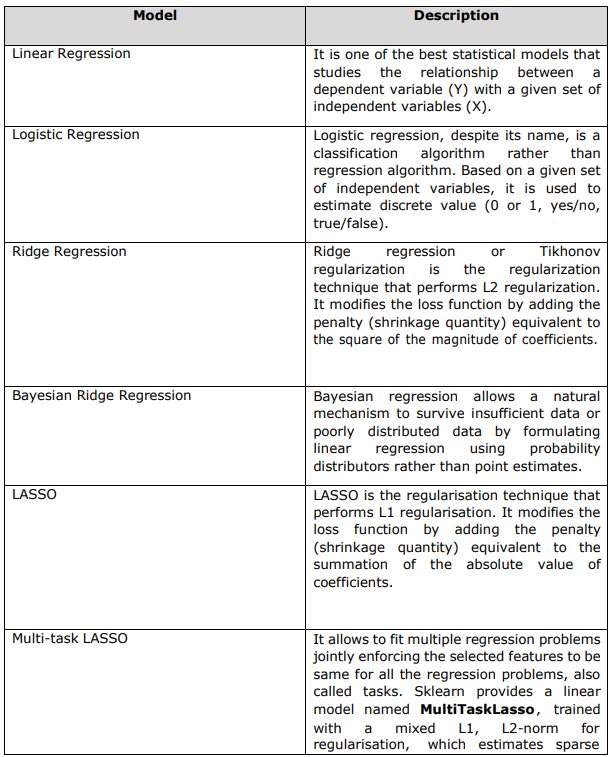

# PERFORMANCE IMPROVEMENT WITH ALGORITHM TUNING
As we know that ML models are parameterized in such a way that their behavior can be adjusted for a specific problem. Algorithm tuning means finding the best combination of these parameters so that the performance of ML model can be improved. This process sometimes called hyperparameter optimization and the parameters of algorithm itself are called hyperparameters and coefficients found by ML algorithm are called parameters.

## Grid Search Parameter Tuning
It is a parameter tuning approach. The key point of working of this method is that it builds and evaluate the model methodically for every possible combination of algorithm parameter specified in a grid. Hence, we can say that this algorithm is having search nature. Hyperparameters are just like k in knn classifier.

In GridSearchCV approach, the machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values. 

**For example, if we want to set two hyperparameters C and Alpha of the Logistic Regression Classifier model, with different sets of values. The grid search technique will construct many versions of the model with all possible combinations of hyperparameters and will return the best one.**

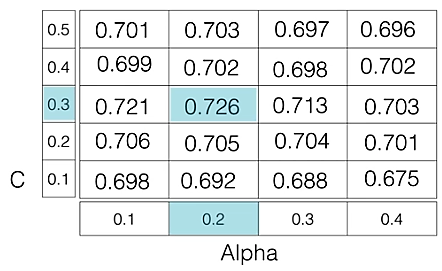

As in the image, for C = [0.1, 0.2, 0.3, 0.4, 0.5] and Alpha = [0.1, 0.2, 0.3, 0.4]. For a combination of C=0.3 and Alpha=0.2, the performance score comes out to be 0.726(Highest), therefore it is selected. 

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)


In [6]:
model = Ridge()
grid = GridSearchCV(model, param_grid)
grid.fit(X, Y)

NameError: name 'Ridge' is not defined

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)


### Without GridsearchCV

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.7922077922077922


### With GridsearchCV

In [92]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [39]:
print(np.logspace(-3,3,7))

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [40]:
#param_grid={"C":np.logspace(-3,3,7), 
            #"penalty":["l1","l2"]}


param_grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
            "penalty":["l1","l2"]}

In [93]:
model = LogisticRegression()
grid_gs = GridSearchCV(model, param_grid)
grid_gs.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [94]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_gs.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_gs.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_gs.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10)

 The best score across ALL searched params:
 0.7728971962616822

 The best parameters across ALL searched params:
 {'C': 10, 'penalty': 'l2'}


In [43]:
model = LogisticRegression(C= 10.0, penalty= 'l2')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.8008658008658008


## Random Search Parameter Tuning
It is a parameter tuning approach. The key point of working of this method is that it
samples the algorithm parameters from a random distribution for a fixed number of
iterations.

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
model = LogisticRegression()
grid_rs = RandomizedSearchCV(model, param_grid)
grid_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [45]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n",grid_rs.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_rs.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_rs.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10)

 The best score across ALL searched params:
 0.7728971962616822

 The best parameters across ALL searched params:
 {'penalty': 'l2', 'C': 10}


In [95]:
model = LogisticRegression(C= 10.0, penalty= 'l2')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.8008658008658008
